In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

After the events of the titanic, data about the passangers which unfortunately became victims of the accident were released, including (of course over 100 years later) whether or not they survived. This data can be utilized in order to predict the survivability of these passengers or a test passenger using known data about said passenger. This prediction model can be used to further determine what would be key in finding out what is most significant in a person's survival in this extreme circumstance.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

The data was provided by Kaggle.com and their titanic ML competition, which contains two main csv files, with the main difference between the training and testing files in whether or not they included the "Survived" column. Both files contain information about the passengers, ranging from age, to sex, to amount of relatives or social class.

In [2]:
df = pd.read_csv('data/titanic.csv')

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

It seems that some bias exists, starting with the fact that richer people, women, and children may have survived more often than other groups, which may make our model prioritize those groups when deciding survivability.

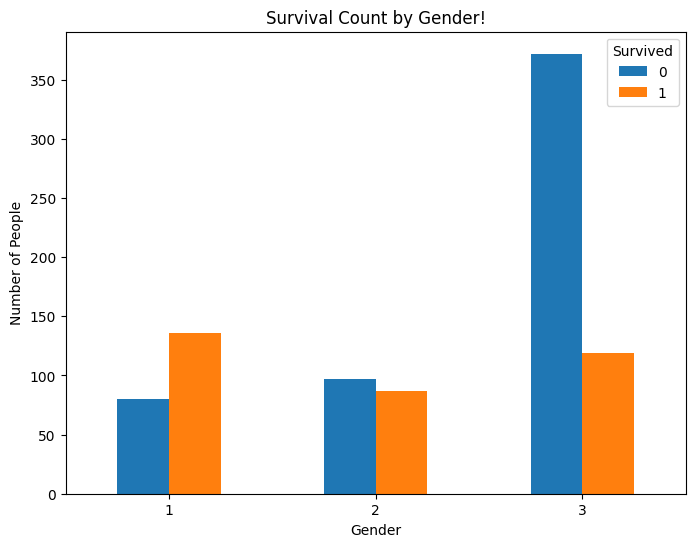

In [3]:
survival_count = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)


survival_count.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Survival Count by Gender!')
plt.xticks(rotation=0)


plt.show()

# 4.Prepare the Data


Apply any data transformations and explain what and why


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 